<a href="https://colab.research.google.com/github/hayunjong83/computer_vision_implement_research/blob/master/keras_resources/iris_dataset_in_keras_and_scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quick start: the Iris dataset in Keras and scikit-learn

원본 글) [keras-hello-world](https://github.com/fastforwardlabs/keras-hello-world/blob/master/kerashelloworld.ipynb)

고수준 신경망 라이브러리를 사용한다면, 부동소수점 연산의 수학적 세부사항, 텐서 연산, GPU 프로그래밍에 대한 이해 없이도 개발자들은 손쉽게 신경망 모델을 생성할 수 있다.

Keras는 대표적인 고수준 신경망 라이브러리로서 머신러닝 연구를 위한 대표적 라이브러리인 scikit-learn처럼 신경망 생성을 위한 API를 제공해준다.

이 예제는 Iris 데이터셋을 가지고, scikit-learn과 keras에서 모델을 구성하고 훈련하는 방식을 비교하고 이해하는 목적을 가지고 있다.

In [1]:
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV

from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils

## Iris data

[Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set)은 1936년 Ronald Fisher가 정리하고 발표한 데이터셋으로서, 머신러닝 프레임워크의 API와 사용법을 설명하기 위해 사용하기 가장 좋은 데이터셋이다.

 데이터셋은 이미 많은 머신러닝 라이브러리, 딥러닝 프레임워크에 포함되어 있는데, 이번 예제에서는 seaborn 라이브러리에서 데이터셋을 불러온다. 레이블링 된 데이터프레임 형태로 데이터를 로드할 수 있는데, 데이터셋의 활용 뿐만 아니라 시각화에도 강점이 있기 때문이다.

In [2]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


각 레코드마다 5개의 컬럼이 존재하는데, 앞의 네 개는 센티미터 단위로 측정된 꽃의 특성값이고, 마지막 컬럼은 데이터의 품종이다. iris 데이터셋은 3가지 품종인 setosa, versicolor, virginica를 가지고 있는데, unique() 메소드를 통해서 확인해볼 수 있다.

In [3]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

iris 데이터셋을 활용하는 실험의 목표는 두개의 꽃잎(petal) 측정값과 꽃받침(sepal) 값을 사용하여 품종을 예측하는 classifier를 만드는 것이다. seaborn을 사용하는 만큼 우선 데이터셋의 특징을 시각화해본다.

[seaborn.pairplot()](https://seaborn.pydata.org/generated/seaborn.pairplot.html)는 각 변수간의 모든 상관관계를 히스토그램과 분포도로 나타내어 준다.

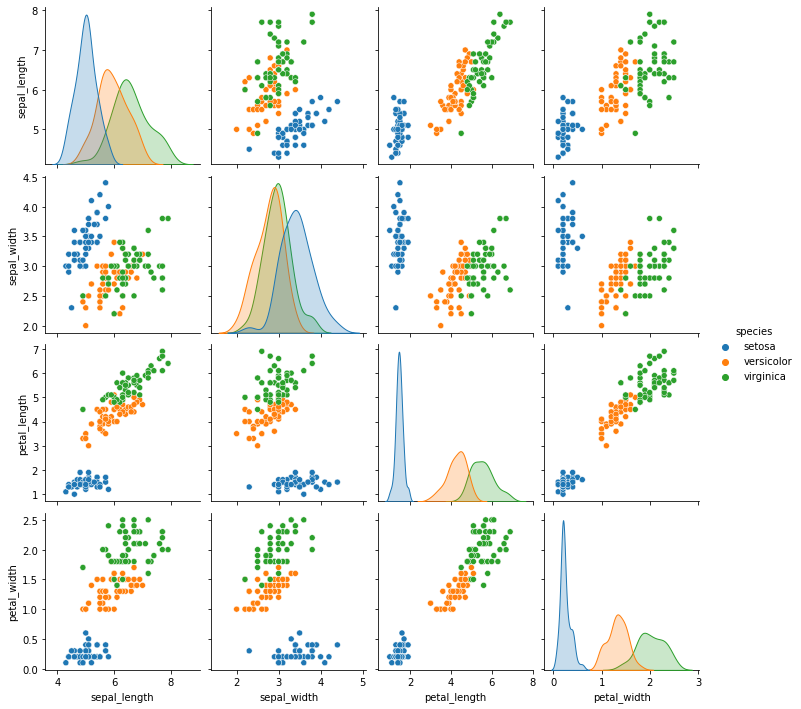

In [4]:
sns.pairplot(iris, hue='species')

원본 예제처럼 각 독립변수의 분포를 KDE(Kernel Density Distribution)가 아닌 히스토그램으로 나타내고 싶다면, diag_kind 값을 hist로 설정해야한다.

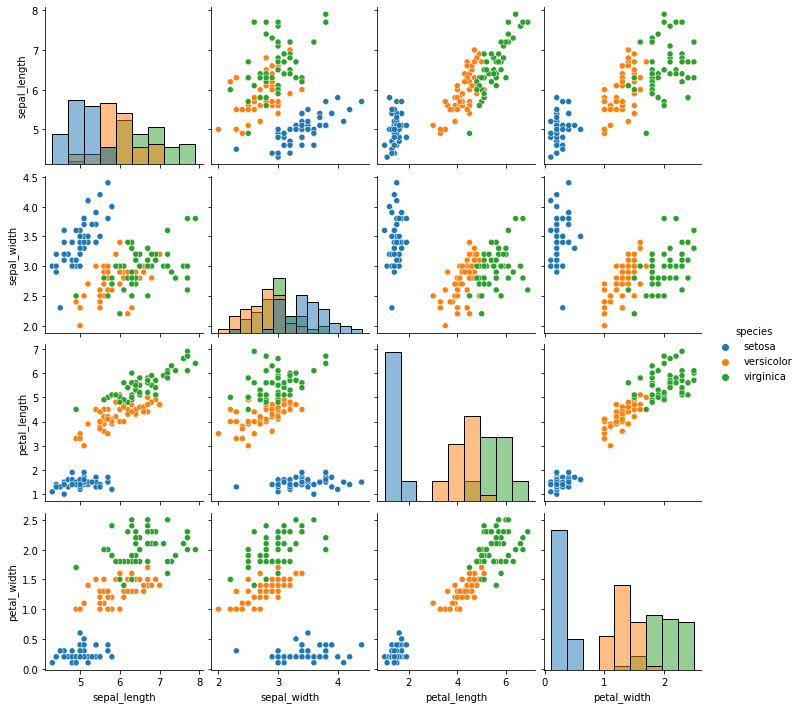

In [5]:
sns.pairplot(iris, hue='species', diag_kind="hist")

## Munge and split the data for training and testing

실험에 사용할 데이터셋을 iris 데이터프레임에서 추출하여, Numpy 배열로 변환해야 한다. 이에 따라 X는 특성값이고, y는 예측할 타겟값이 된다.

In [6]:
X = iris.values[:, :4]
y = iris.values[:, 4]

print(type(X))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


지도학습에서는 데이터의 일부로 훈련하고, 나머지 데이터에서 훈련된 모델의 성능을 평가한다. 이를 위해서 데이터를 분할해야하는데 scikit-learn의 [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)을 사용하면 손쉽게 데이터를 나눌 수 있다.

In [7]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.5, test_size=0.5, random_state=0)

## Train a scikit-learn classifier

예제에서는 logistic regression classifier를 사용해 데이터셋을 훈련하고, 평가한다. [LogisticRegressionCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html)는 cv인자 값을 지정해주면 cross-validation을 수행할 수 있다. 

scikit-learn의 Estimator객체와 같이, LogisticRegressionCV classifier도 .fit() 메소드를 사용해 훈련데이터에 가장 잘 맞는 모델을 구할 수 있다.

In [8]:
lr = LogisticRegressionCV()
lr.fit(train_X, train_y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

## Assess the classifier using accuracy

In [9]:
print("Accuracy = {:.2f}".format(lr.score(test_X, test_y)))

Accuracy = 0.93


## Now do something very similar with Keras

Keras는 프랑수와 숄레가 만든 고수준 신경망 라이브러리(high-level neural network)다. 위에서 scikit-learn을 사용한 간단한 classifier처럼 손쉽게 Keras에서도 classifier를 만들어 볼 수 있다.
이 때, 데이터셋을 변환하는 방법이 조금 다르고, 분류기 네트워크를 생성하기 위해서는 먼저 신경망을 정의해야 한다는 점이 약간 다르다고 볼 수 있다.

문자열로 된 레이블을 그대로 사용한 scikit-learn과 달리, Keras에서는 각 레이블을 원핫인코딩 할 필요가 있다. 

seaborn에서 받은 데이터셋이 데이터프레임으로 된 점을 활용하여 [pandas.get_dummies()](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) 메소드를 사용할 수도 있고, keras의 to_categorical() 메소드를 사용할 수도 있다.

참고) 예제가 작성되었던 시점과 달리 tensorflow2에 포함된 케라스의 메소드는 그 형태가 다를 수 있다.

In [10]:
def one_hot_encode_object_array(arr):
    '''One hot encode a numpy array of objects (e.g. strings)'''
    uniques, ids = np.unique(arr, return_inverse=True)
    return np_utils.to_categorical(ids, len(uniques))

In [11]:
train_y_ohe = one_hot_encode_object_array(train_y)
test_y_ohe = one_hot_encode_object_array(test_y)

## Build the neural network model

앞서 언급된 것처럼 Keras에서는 사용하려는 모델의 생성에 앞서 직접 모델의 구조를 명시할 필요가 있다.

데이터의 특성이나 클래스의 수는 정해져있지만, 케라스에서는 레이어의 수, 크기, 레이어 간의 연결의 특징 등 모델 구조를 직접 결정하고 정의할 수 있다.

이번 예제에서는 특히 간단한 신경망을 만든다. 입력의 수는 4개, 클래스의 수는 3개이므로 입력 레이어와 출력 레이어의 유닛 수는 정해져있다. 따라서 단지 hidden layer를 정의하기만 하면 되는데, 여기에서는 16개의 유닛을 가진 은닉층 하나만을 추가한다. 

모델 정의는 가장 일반적인 방식은 sequential 구조로 층을 쌓을 것이지만, 연산그래프를 정의하는 또다른 방식도 가능함을 염두에 둔다.

In [12]:
model = Sequential()

In [13]:
model.add(Dense(16, input_shape=(4,)))
model.add(Activation('sigmoid'))

In [14]:
model.add(Dense(3))
model.add(Activation('softmax'))

최적화 전략과 손실함수를 선택하고, 훈련 시에 정확도를 기준으로 정하도록 한다.

In [15]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Use the neural network classifier

사용할 신경망 모델을 정의하고 컴파일하였다. 이제는 scikit-learn()과 유사하게 .fit()과 .predict()메소드를 사용할 수 있다.

신경망을 훈련시키는 것은 데이터를 일정한 묶음으로 훈련시키는 미니배치 개념을 포함한다. 모든 데이터를 미니배치로 나눠 학습이 끝나면, 한 에포크(epoch)가 지난 것이다. 미니배치의 크기를 정하는 것은 해결하려는 문제에 달려있는 중요한 사항인데, 이번 예제에서는 단순하게 배치의 크기를 1로 정한다. 이것은 결국 고전적인 확률적 경사 하강법(Stochastic gradient descent)방식으로 학습시킴을 뜻한다.

참고) [Failed to convert a NumPy array to a Tensor](https://devbull.xyz/failed-to-convert-a-numpy-array-to-a-tensor-unsupported-object-type-float/)
Keras에서 입력데이터의 데이터형을 명시적으로 변환해야 오류를 피할 수 있다.

In [16]:
train_X = train_X.astype(float)

In [17]:
model.fit(train_X, train_y_ohe, epochs=100, batch_size=1, verbose=0)

scikit-learn()의 .score()와 같은 역할을 .evaluate() 메소드가 시행한다. evaluate() 메소드는 loss function과 컴파일 때 요청한 메트릭 값을 함께 반환한다.

In [18]:
test_X = test_X.astype(float)

In [19]:
loss, accuracy = model.evaluate(test_X, test_y_ohe, verbose=0)
print("Accuracy  = {:.2f}".format(accuracy))

Accuracy  = 0.97
